# Titanic Dataset – Exploratory Data Analysis

**Goal:**  
To understand passenger survival patterns using data analysis and visualization.

**Author:** Venugopal Kale  
**Domain:** Data Science  
**Tools:** Python, Pandas, Matplotlib, Seaborn

## 📌 Objective

The goal of this project is to perform Exploratory Data Analysis (EDA) on the Titanic dataset
to understand the factors that influenced passenger survival during the disaster.

## 📊 Dataset Description

The Titanic dataset contains information about passengers such as:

- Passenger class
- Gender
- Age
- Fare
- Embarkation point
- Survival status

**Target Variable:** `Survived`

## 🧰 Importing Required Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 📂 Loading the Dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

## 🔍 Understanding the Dataset

In this step, we explore:
- Number of rows and columns
- Column names
- Data types
- Sample records

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 🧹 Handling Missing Values

We analyze missing values to understand:
- Which columns contain null values
- How missing values might affect analysis
- Possible strategies to handle them

In [ ]:
print(df["Age"].mean(),df["Age"].median())

29.69911764705882 28.0


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#df = df.drop(columns = "Cabin")
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

## 📈 Univariate Analysis

Univariate analysis focuses on analyzing individual features such as:
- Age distribution
- Gender count
- Passenger class distribution

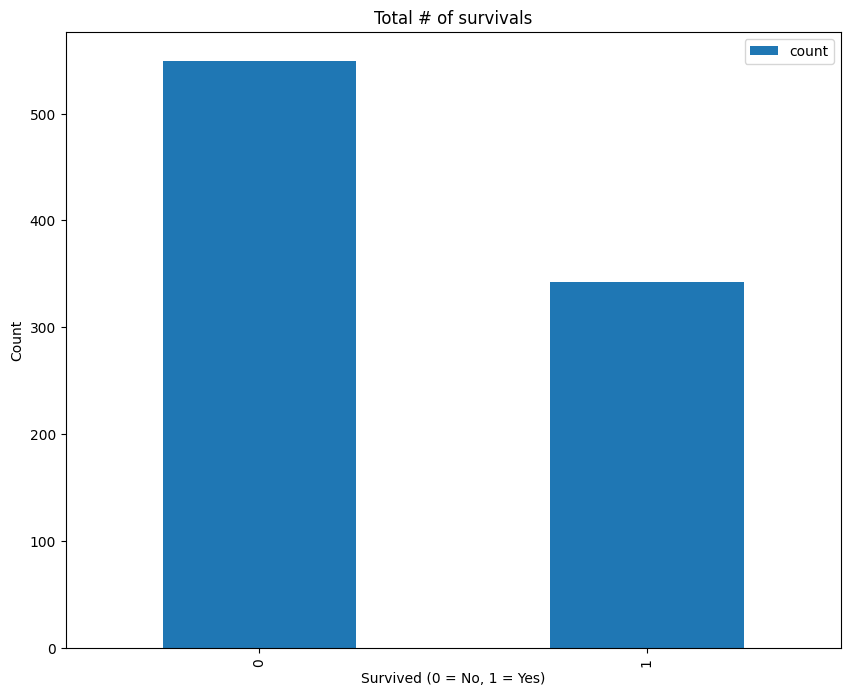

In [ ]:
plt.figure(figsize=(10,8))
df["Survived"].value_counts().plot(kind="bar")
plt.title("Total # of survivals")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend()
plt.show()

## 🔗 Bivariate Analysis

This analysis explores relationships between two variables, especially:
- Survival vs Gender
- Survival vs Passenger Class
- Survival vs Age

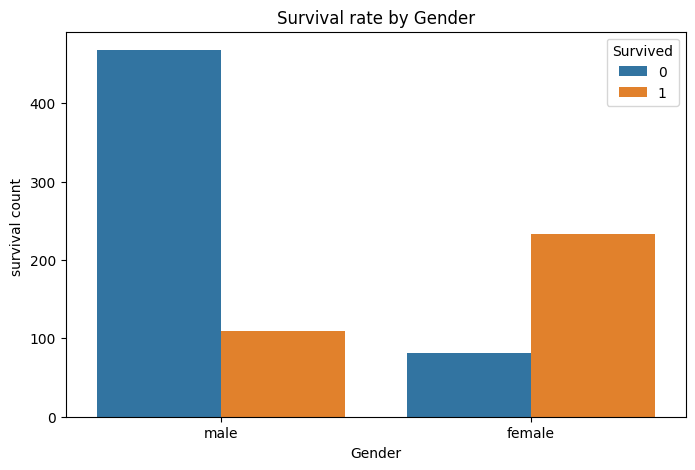

In [ ]:
plt.figure(figsize= (8,5))
sns.countplot(data= df,x="Sex",hue= "Survived")
plt.title("Survival rate by Gender")
plt.xlabel("Gender")
plt.ylabel("survival count ")
plt.show()

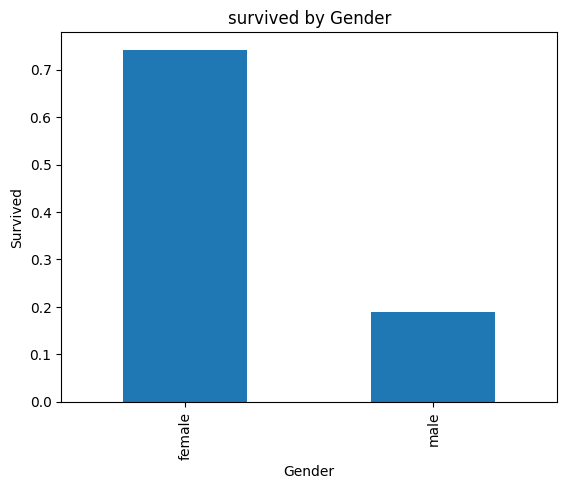

In [ ]:
survived_by_sex = df.groupby("Sex")["Survived"].mean()
survived_by_sex.plot(kind = "bar")
plt.title("survived by Gender")
plt.xlabel("Gender")
plt.ylabel("Survived")
plt.show()

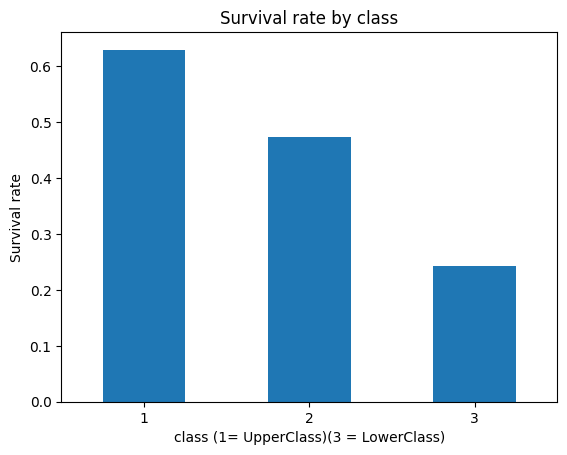

In [ ]:
survival_by_class = df.groupby("Pclass")["Survived"].mean()
survival_by_class.plot(kind="bar")
plt.title("Survival rate by class")
plt.xlabel("class (1= UpperClass)(3 = LowerClass)")
plt.ylabel("Survival rate")
plt.xticks(rotation=0)
plt.show()

## 📊 Multivariate Analysis

Multivariate analysis helps understand how multiple features together
influence survival patterns.

In [ ]:
#import pandas as pd

pd.crosstab(df['Pclass'], df['Sex'], values=df['Survived'], aggfunc='mean')

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


## 🧠 Key Insights

- Female passengers had a significantly higher survival rate.
- First-class passengers survived more than lower classes.
- Male passengers in third class had the lowest survival rate.
- Age also played a role in survival probability.

## ✅ Conclusion

Exploratory Data Analysis revealed that survival on the Titanic was strongly
influenced by gender, passenger class, and age. These insights can be used
for further predictive modeling.

## 🚀 Future Work

- Feature engineering
- Machine learning model building
- Survival prediction using Logistic Regression

## Machine Learning Model – Logistic Regression

In [69]:
# selecte values
X = df[['Age','Sex','Pclass','Fare','Embarked']]
# target values
y = df['Survived']
X.head(),y.head()

(    Age     Sex  Pclass     Fare Embarked
 0  22.0    male       3   7.2500        S
 1  38.0  female       1  71.2833        C
 2  26.0  female       3   7.9250        S
 3  35.0  female       1  53.1000        S
 4  35.0    male       3   8.0500        S,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64)

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.2 , random_state = 42)
X_train.shape,X_test.shape

((712, 5), (179, 5))

In [71]:


# Encoding
from sklearn.preprocessing import LabelEncoder
# label encoding sex
le = LabelEncoder()
X_train["Sex"] = le.fit_transform(X_train["Sex"])
X_test["Sex"] = le.transform(X_test["Sex"])
# One-Hot Encoding Embarked
X_train = pd.get_dummies(X_train,columns = ["Embarked"],drop_first = True)
X_test= pd.get_dummies(X_test,columns = ["Embarked"],drop_first = True)
X_train.head()
#X_train.shape

,Age,Sex,Pclass,Fare,Embarked_Q,Embarked_S
331,45.5,1,1,28.5000,False,True
733,23.0,1,2,13.0000,False,True
382,32.0,1,3,7.9250,False,True
704,26.0,1,3,7.8542,False,True
813,6.0,0,3,31.2750,False,True


In [72]:
X_train.shape, X_test.shape

((712, 6), (179, 6))

In [73]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [76]:
y_pred = model.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7988826815642458